#Word Embedding using Linear funcition

In this notebook, we'll try to create a word embedding network for a sequence of sentence as before but we will not create every node from scratch.

In [2]:
%pip install lightning
%pip install torch
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 17.0 MB/s eta 0:00:00


Importing necessary packages

In [8]:
import torch
import torch.nn as nn

from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

import lightning as L

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

##Preparing and one-hot encoding the data

In [5]:
inputs = torch.tensor([[1., 0., 0., 0.],
                       [0., 1., 0., 0.,],
                       [0., 0., 1., 0.,],
                       [0., 0., 0., 1.,]
                      ])

labels = torch.tensor([[0., 1., 0., 0.],
                       [0., 0., 1., 0.],
                       [0., 0., 0., 1.],
                       [0., 1., 0., 0.]])

# Combine the inputs and labels into dataset

dataset = TensorDataset(inputs, labels)

# Create a dataloader
dataloader = DataLoader(dataset)

for input, label in dataloader:
  print(input[0], label)
  break

tensor([1., 0., 0., 0.]) tensor([[0., 1., 0., 0.]])


##Creating the model

this time, we will not create the model's weights from scratch

In [6]:
class WordEmbedding(L.LightningModule):
  def __init__(self):
    super().__init__()

    self.input_to_hidden = nn.Linear(4, 2, bias=False)
    self.hidden_to_output = nn.Linear(2,4, bias=False)

    self.loss = nn.CrossEntropyLoss()

  def forward(self, input):
    hidden = self.input_to_hidden(input)
    output = self.hidden_to_output(hidden)

    return output

  def configure_optimizers(self):
    return Adam(self.parameters(), lr=0.1)

  def training_step(self, batch, batch_idx):
    input, label = batch
    output = self(input)

    loss = self.loss(output, label)

    return loss

##Graphing the un-trained word embedding values

Instantiating the model

In [7]:
model = WordEmbedding()

In [11]:
data = {
    "w1" : model.input_to_hidden.weight.detach()[0].numpy(),
    "w2" : model.input_to_hidden.weight.detach()[1].numpy(),
    "token" : ["Troll 2", "is", "great", "Gymkata"],
    "input" : ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)
df

,w1,w2,token,input
0,0.048407,-0.347170,Troll 2,input1
1,0.395344,0.443797,is,input2
2,0.280531,-0.158004,great,input3
3,0.329139,0.154487,Gymkata,input4


Let's plot it in a scatter plot to see the relationship of each token.

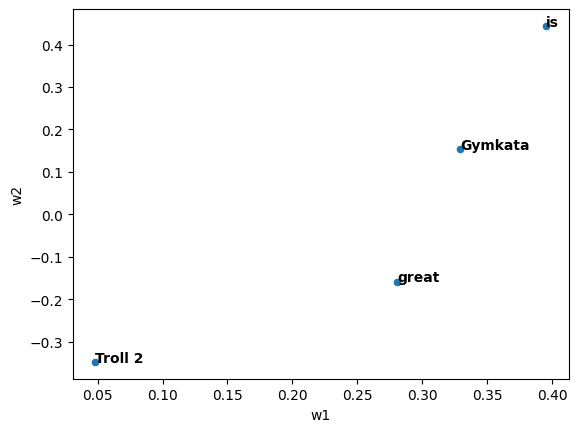

In [12]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

##Training

now let's train our model using max of 100 epoch.

In [13]:
trainer = L.Trainer(max_epochs=100)
trainer.fit(model, dataloader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
INFO:lightning.pytorch.callbacks.model_summary:
  | Name             | Type  

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


##Graphing the pre-trained model

In [14]:
data = {
    "w1" : model.input_to_hidden.weight.detach()[0].numpy(),
    "w2" : model.input_to_hidden.weight.detach()[1].numpy(),
    "token" : ["Troll 2", "is", "great", "Gymkata"],
    "input" : ["input1", "input2", "input3", "input4"]
}

df = pd.DataFrame(data)
df

,w1,w2,token,input
0,2.876617,-1.395388,Troll 2,input1
1,1.362567,2.625498,is,input2
2,-2.878883,1.533476,great,input3
3,2.880963,-1.657152,Gymkata,input4


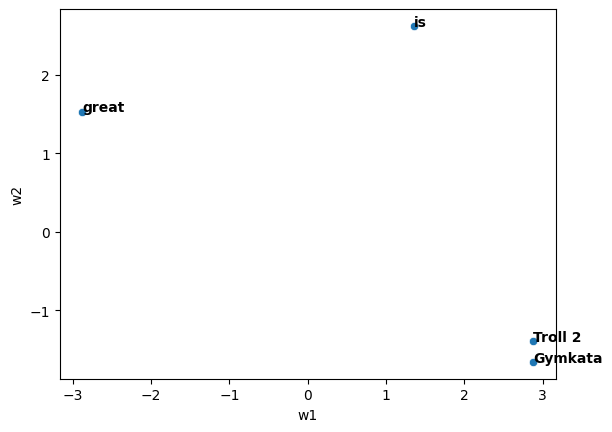

In [15]:
sns.scatterplot(data=df, x="w1", y="w2")

plt.text(df.w1[0], df.w2[0], df.token[0],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[1], df.w2[1], df.token[1],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[2], df.w2[2], df.token[2],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.text(df.w1[3], df.w2[3], df.token[3],
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='semibold')

plt.show()

Now, as we can see, The token **Troll 2** and **Gymkata** which has similar meaning and context are close.